In [85]:
pip install wordcloud

In [86]:
pip install imbalanced-learn

In [87]:
#NLTK libraries
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE

In [88]:
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

In [90]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [91]:

pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [92]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [93]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [95]:
#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [97]:
reviews = pd.read_csv(r"C:\Users\DEll\Downloads\sentiment_analysis\Corona.csv", encoding='latin1')

In [98]:
reviews.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [99]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(reviews.shape))
print ("The Information about the dataset:" + str(reviews.info()))

The shape of the  data is (row, column):(41157, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
The Information about the dataset:None


In [100]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [101]:
print('The distribution of categories of sentiment:') 
reviews['Sentiment'].value_counts()

The distribution of categories of sentiment:


Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [102]:
print('The distribution of categories of location:') 
reviews['Location'].value_counts()

The distribution of categories of location:


Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64

In [103]:
import seaborn as sns

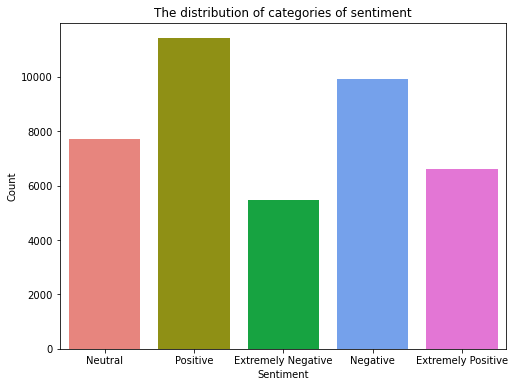

In [104]:
plt.figure(figsize=(8,6)) # Optional: Set the figure size
sns.countplot(x='Sentiment', data=reviews, palette=['#F8766D', '#A3A500', '#00BA38', '#619CFF', '#F564E3'])
plt.title('The distribution of categories of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [105]:
reviews.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [106]:
# Clean the date column (remove leading/trailing spaces)
reviews["TweetAt"] = reviews["TweetAt"].str.strip()

# Split the cleaned date using "/" as the delimiter
split_date = reviews["TweetAt"].str.split("/", n=2, expand=True)

In [107]:
reviews.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [108]:
# Extract only the year from the 'TweetAt' column
reviews['year'] = reviews['TweetAt'].str[-4:]

# Convert the 'year' column to integer type if needed
reviews['year'] = reviews['year'].astype(int)


In [109]:
# Extract only the month from the 'TweetAt' column
reviews['month'] = reviews['TweetAt'].str[3:5]

# Convert the 'month' column to integer type if needed
reviews['month'] = reviews['month'].astype(int)

In [110]:
# Extract only the date from the 'TweetAt' column
reviews['date'] = reviews['TweetAt'].str[:2]

# Convert the 'date' column to integer type if needed
reviews['date'] = reviews['date'].astype(int)

In [111]:
reviews.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,date
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,2020,3,16
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2020,3,16


In [112]:
print('The year - wise count of reviews:')
reviews['year'].value_counts()

The year - wise count of reviews:


year
2020    41157
Name: count, dtype: int64

In [113]:
print('The month - wise count of reviews:')
reviews['month'].value_counts()

The month - wise count of reviews:


month
3    25499
4    15658
Name: count, dtype: int64

In [114]:
print('The date - wise count of reviews:')
reviews['date'].value_counts()

The date - wise count of reviews:


date
20    3448
19    3215
25    2979
18    2742
21    2653
22    2114
23    2062
17    1977
8     1881
7     1843
6     1742
24    1480
9     1471
13    1428
26    1277
5     1131
10    1005
2      954
11     909
3      810
12     803
4      767
16     656
1      630
27     345
31     316
14     284
29     125
30      87
28      23
Name: count, dtype: int64

In [115]:
print('Year - wise count of sentiments:')
reviews.groupby(['year','Sentiment']).size()

Year - wise count of sentiments:


year  Sentiment         
2020  Extremely Negative     5481
      Extremely Positive     6624
      Negative               9917
      Neutral                7713
      Positive              11422
dtype: int64

In [116]:
# Check for duplicate values in the 'UserName' column
duplicates = reviews['UserName'].duplicated()

# If you want to see the rows with duplicate 'UserName' values:
duplicate_rows = reviews[duplicates]

# If you want to count the number of duplicate 'UserName' values:
num_duplicates = duplicates.sum()

# Print the results
print("Number of duplicate UserName values:", num_duplicates)
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate UserName values: 0
Duplicate rows:
Empty DataFrame
Columns: [UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment, year, month, date]
Index: []


In [117]:
reviews = reviews.drop(['UserName','ScreenName','TweetAt'], axis=1)

In [118]:
reviews.head(5)

,Location,OriginalTweet,Sentiment,year,month,date
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,UK,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
3,NaN,My food stock is not the only one which is emp...,Positive,2020,3,16
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2020,3,16


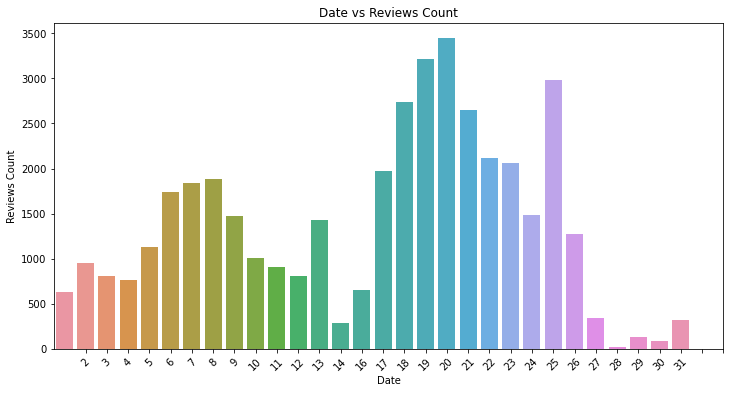

In [119]:
# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Sort the DataFrame by date
dayreview.sort_values(by='date', inplace=True)

# Create a bar plot
sns.barplot(x="date", y="OriginalTweet", data=dayreview)

# Customize the x-axis ticks and labels
plt.xticks(range(1, 32))  # Assuming you have data for the 31 days of a month
plt.title('Date vs Reviews Count')
plt.xlabel('Date')
plt.ylabel('Reviews Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [120]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['OriginalTweet'] = reviews['OriginalTweet'].apply(lambda x: clean_review(x))
reviews.head()

,Location,OriginalTweet,Sentiment,year,month,date
0,London,menyrbie philgahan chrisitv and and,Neutral,2020,3,16
1,UK,advice talk to your neighbours family to excha...,Positive,2020,3,16
2,Vagabonds,coronavirus australia woolworths to give elder...,Positive,2020,3,16
3,NaN,my food stock is not the only one which is emp...,Positive,2020,3,16
4,NaN,me ready to go at supermarket during the outb...,Extremely Negative,2020,3,16


In [121]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   OriginalTweet  41157 non-null  object
 2   Sentiment      41157 non-null  object
 3   year           41157 non-null  int32 
 4   month          41157 non-null  int32 
 5   date           41157 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 1.4+ MB


In [129]:
reviews.dropna(subset=['Location'], inplace=True)

In [130]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       32567 non-null  object 
 1   OriginalTweet  32567 non-null  object 
 2   Sentiment      32567 non-null  object 
 3   year           32567 non-null  int32  
 4   month          32567 non-null  int32  
 5   date           32567 non-null  int32  
 6   polarity       32567 non-null  float64
 7   review_len     32567 non-null  int64  
 8   word_count     32567 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(3)
memory usage: 2.1+ MB


In [131]:
reviews['polarity'] = reviews['OriginalTweet'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['OriginalTweet'].astype(str).apply(len)
reviews['word_count'] = reviews['OriginalTweet'].apply(lambda x: len(str(x).split()))
reviews.head()

,Location,OriginalTweet,Sentiment,year,month,date,polarity,review_len,word_count
0,London,menyrbie philgahan chrisitv and and,Neutral,2020,3,16,0.000000,38,5
1,UK,advice talk to your neighbours family to excha...,Positive,2020,3,16,0.166667,237,38
2,Vagabonds,coronavirus australia woolworths to give elder...,Positive,2020,3,16,-0.200000,98,12
5,"ÃT: 36.319708,-82.363649",as news of the regionâs first confirmed case...,Positive,2020,3,16,0.098333,212,34
6,"35.926541,-78.753267",cashier at grocery store was sharing his insig...,Positive,2020,3,16,0.000000,143,26


In [138]:
!pip install vaderSentiment
import vaderSentiment

In [139]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [140]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [142]:
reviews['sentiment_score']=reviews['OriginalTweet'].apply(lambda x:compound_score(x))
reviews['sentiment_score']

0        0.0000
1        0.2500
2        0.4588
5        0.4939
6        0.4215
          ...  
41147   -0.4754
41149   -0.2500
41150    0.5106
41152    0.0000
41156   -0.4576
Name: sentiment_score, Length: 32567, dtype: float64

In [143]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [144]:
reviews['review_category']=reviews['sentiment_score'].apply(lambda x :sentiment_category(x))

Text(0.5, 1.0, 'Distribution of Reviews Category')

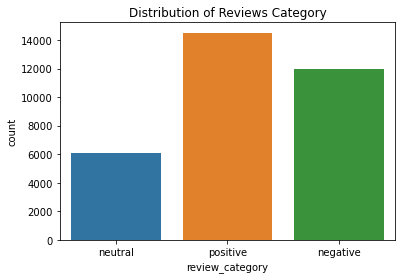

In [145]:
sns.countplot(reviews['review_category']).set_title("Distribution of Reviews Category")

In [152]:
reviews.head(5)

,Location,OriginalTweet,Sentiment,year,month,date,polarity,review_len,word_count,sentiment_score,review_category
0,London,menyrbie philgahan chrisitv and and,Neutral,2020,3,16,0.000000,38,5,0.0000,neutral
1,UK,advice talk to your neighbours family to excha...,Positive,2020,3,16,0.166667,237,38,0.2500,positive
2,Vagabonds,coronavirus australia woolworths to give elder...,Positive,2020,3,16,-0.200000,98,12,0.4588,positive
5,"ÃT: 36.319708,-82.363649",as news of the regionâs first confirmed case...,Positive,2020,3,16,0.098333,212,34,0.4939,positive
6,"35.926541,-78.753267",cashier at grocery store was sharing his insig...,Positive,2020,3,16,0.000000,143,26,0.4215,positive


In [157]:
positive_review = reviews[reviews['review_category'] == 'positive']
neutral_review = reviews[reviews['review_category'] == 'neutral']
negative_review = reviews[reviews['review_category'] == 'negative']

In [161]:
from wordcloud import WordCloud, STOPWORDS

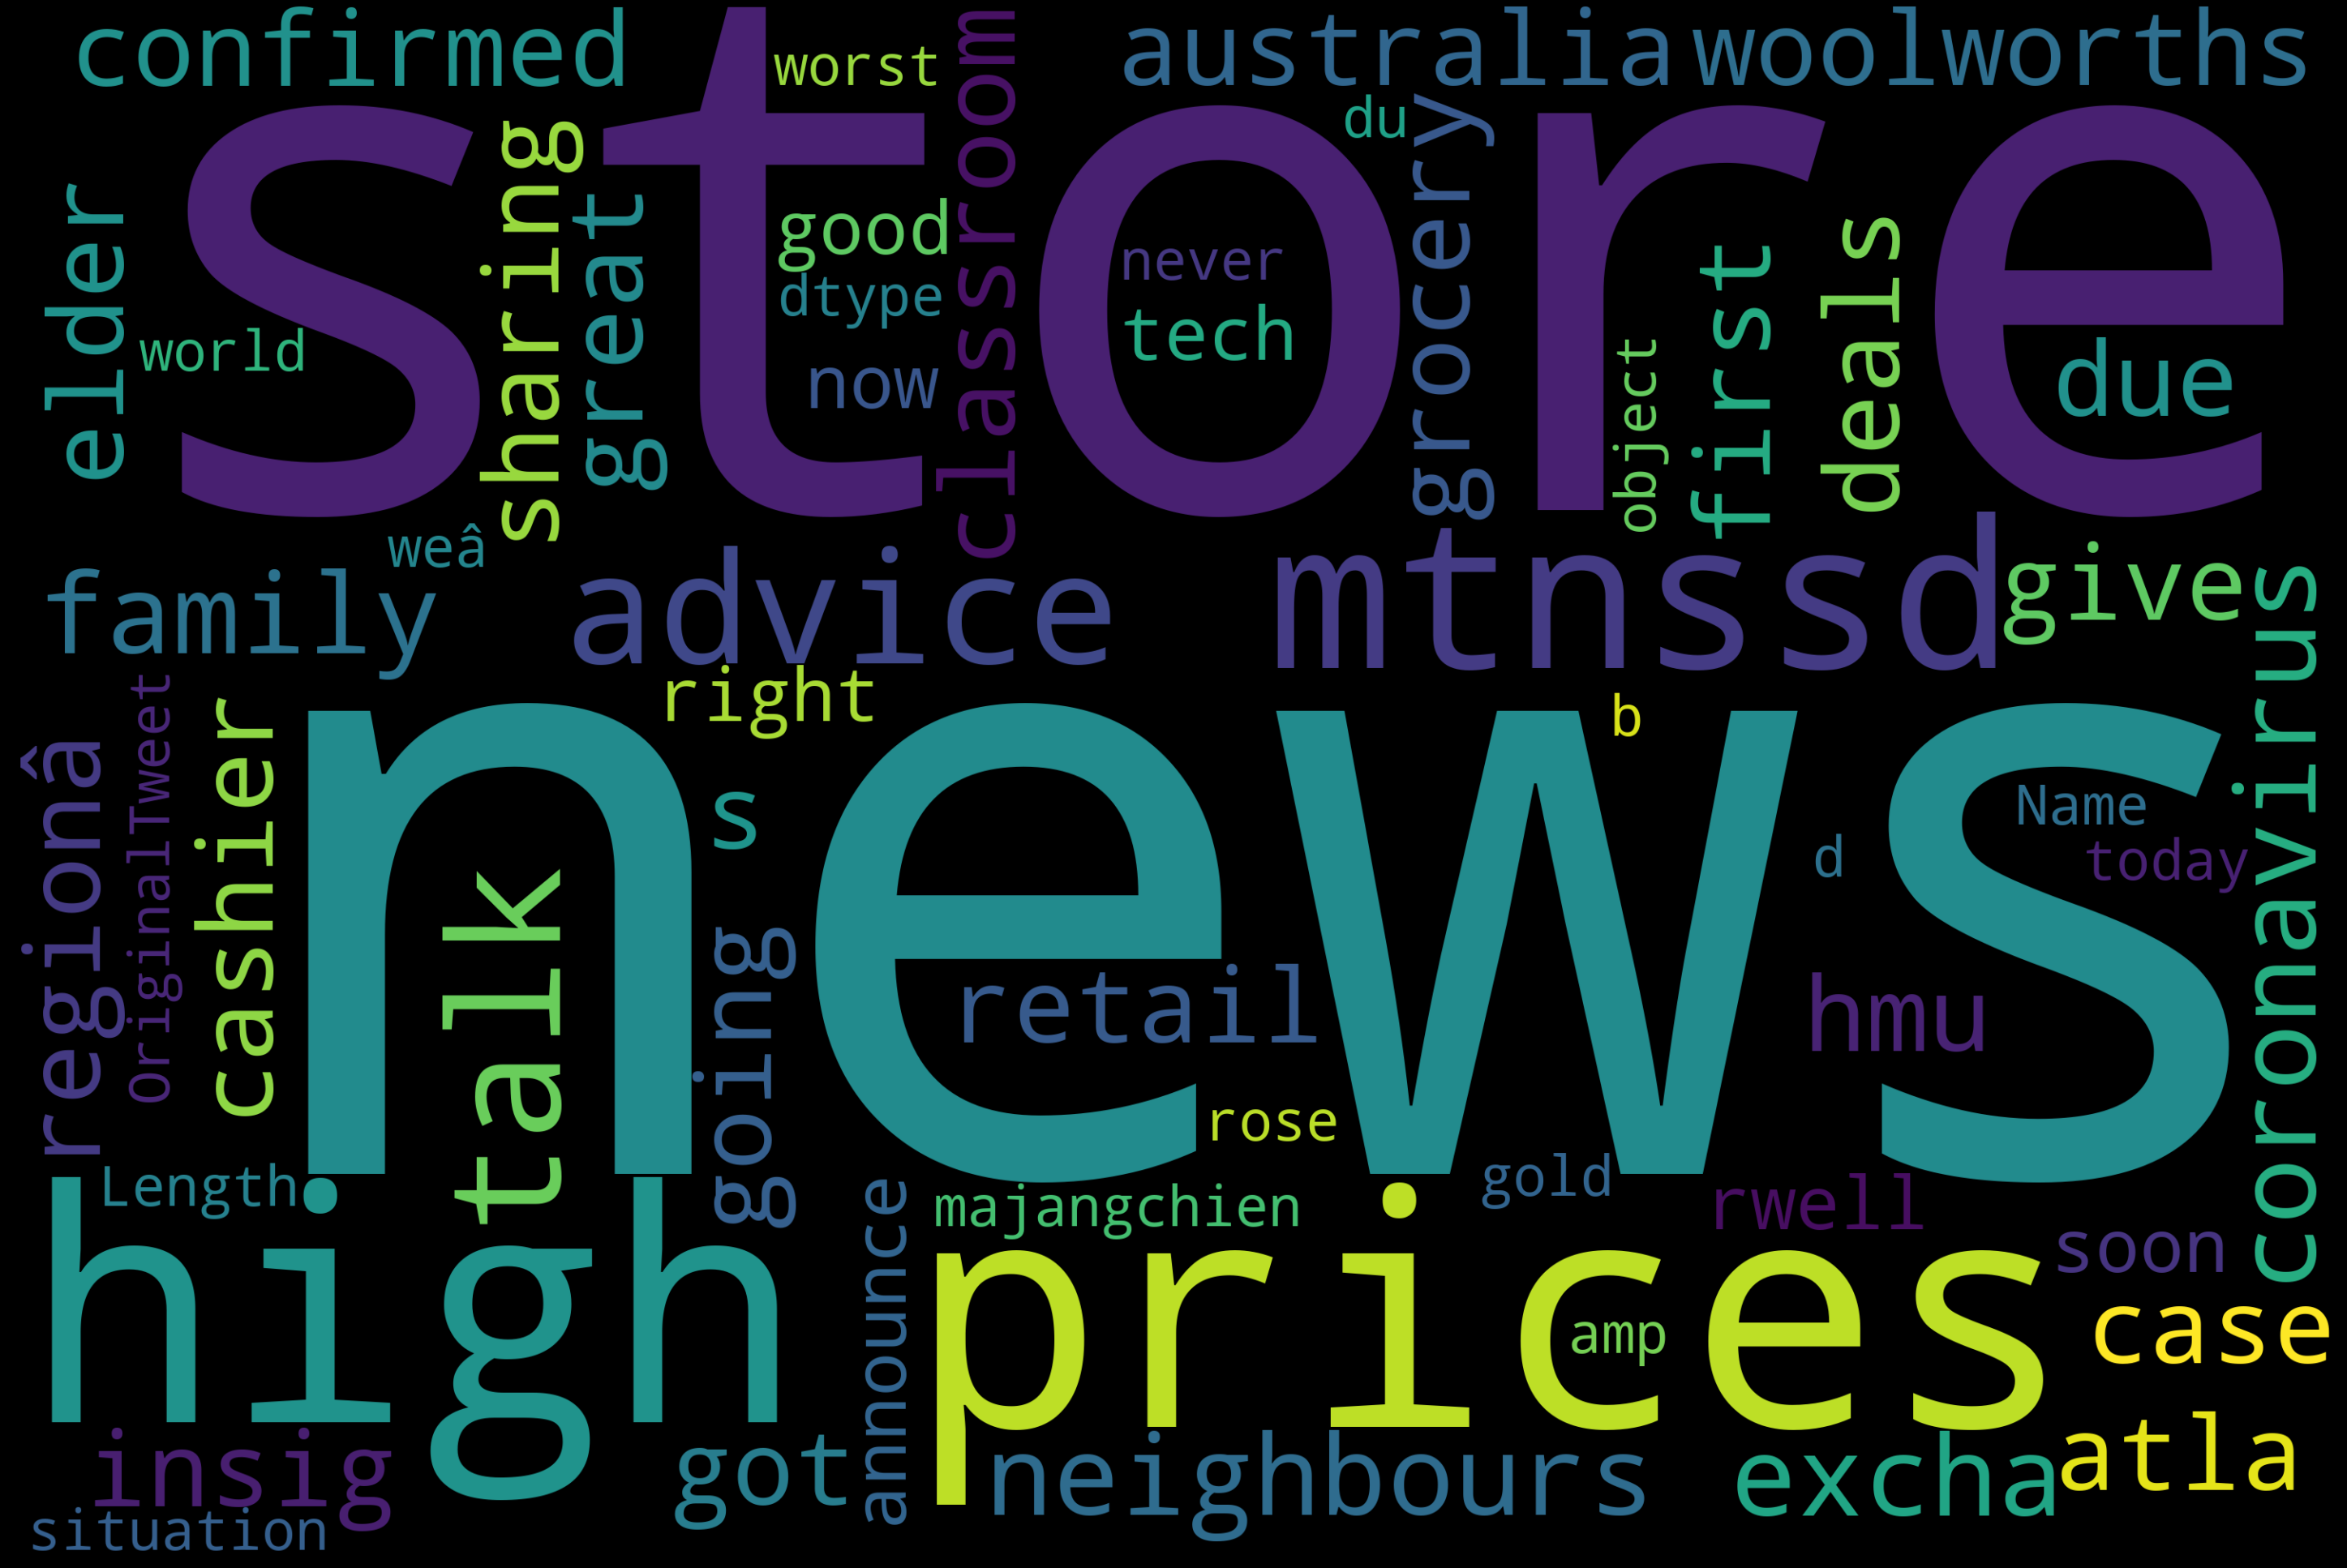

In [162]:
text = positive_review["OriginalTweet"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

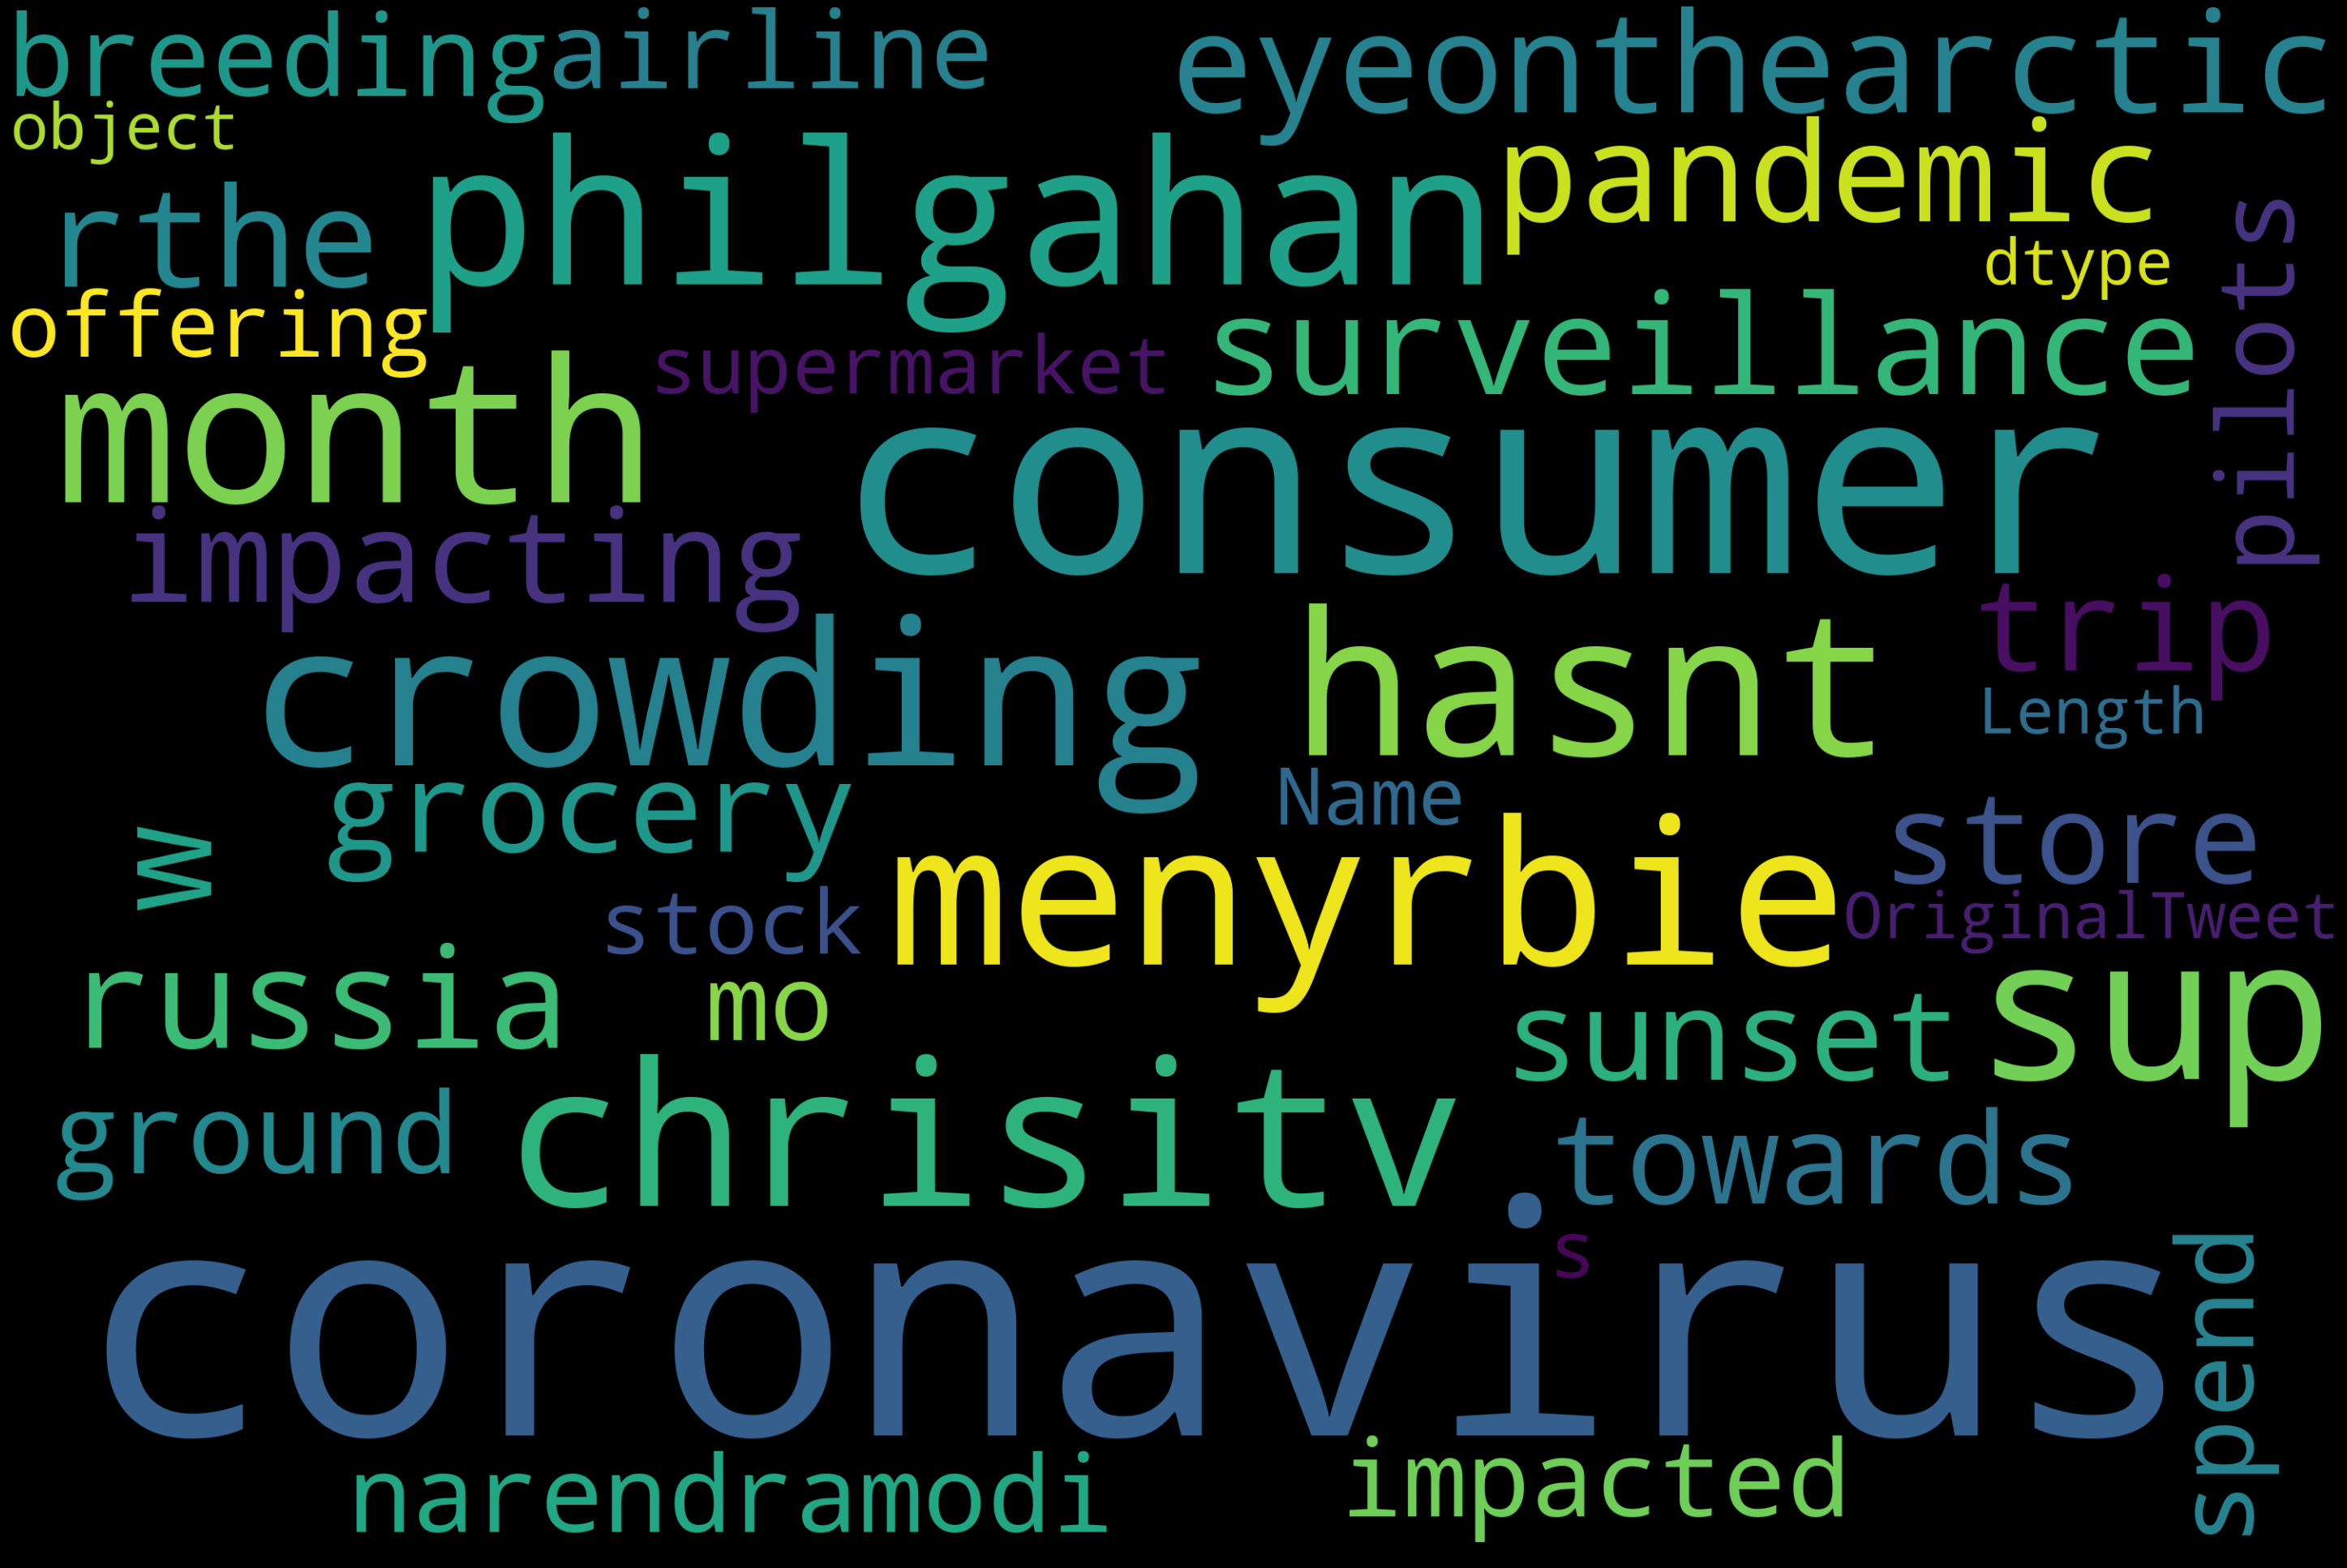

In [163]:
text = neutral_review["OriginalTweet"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

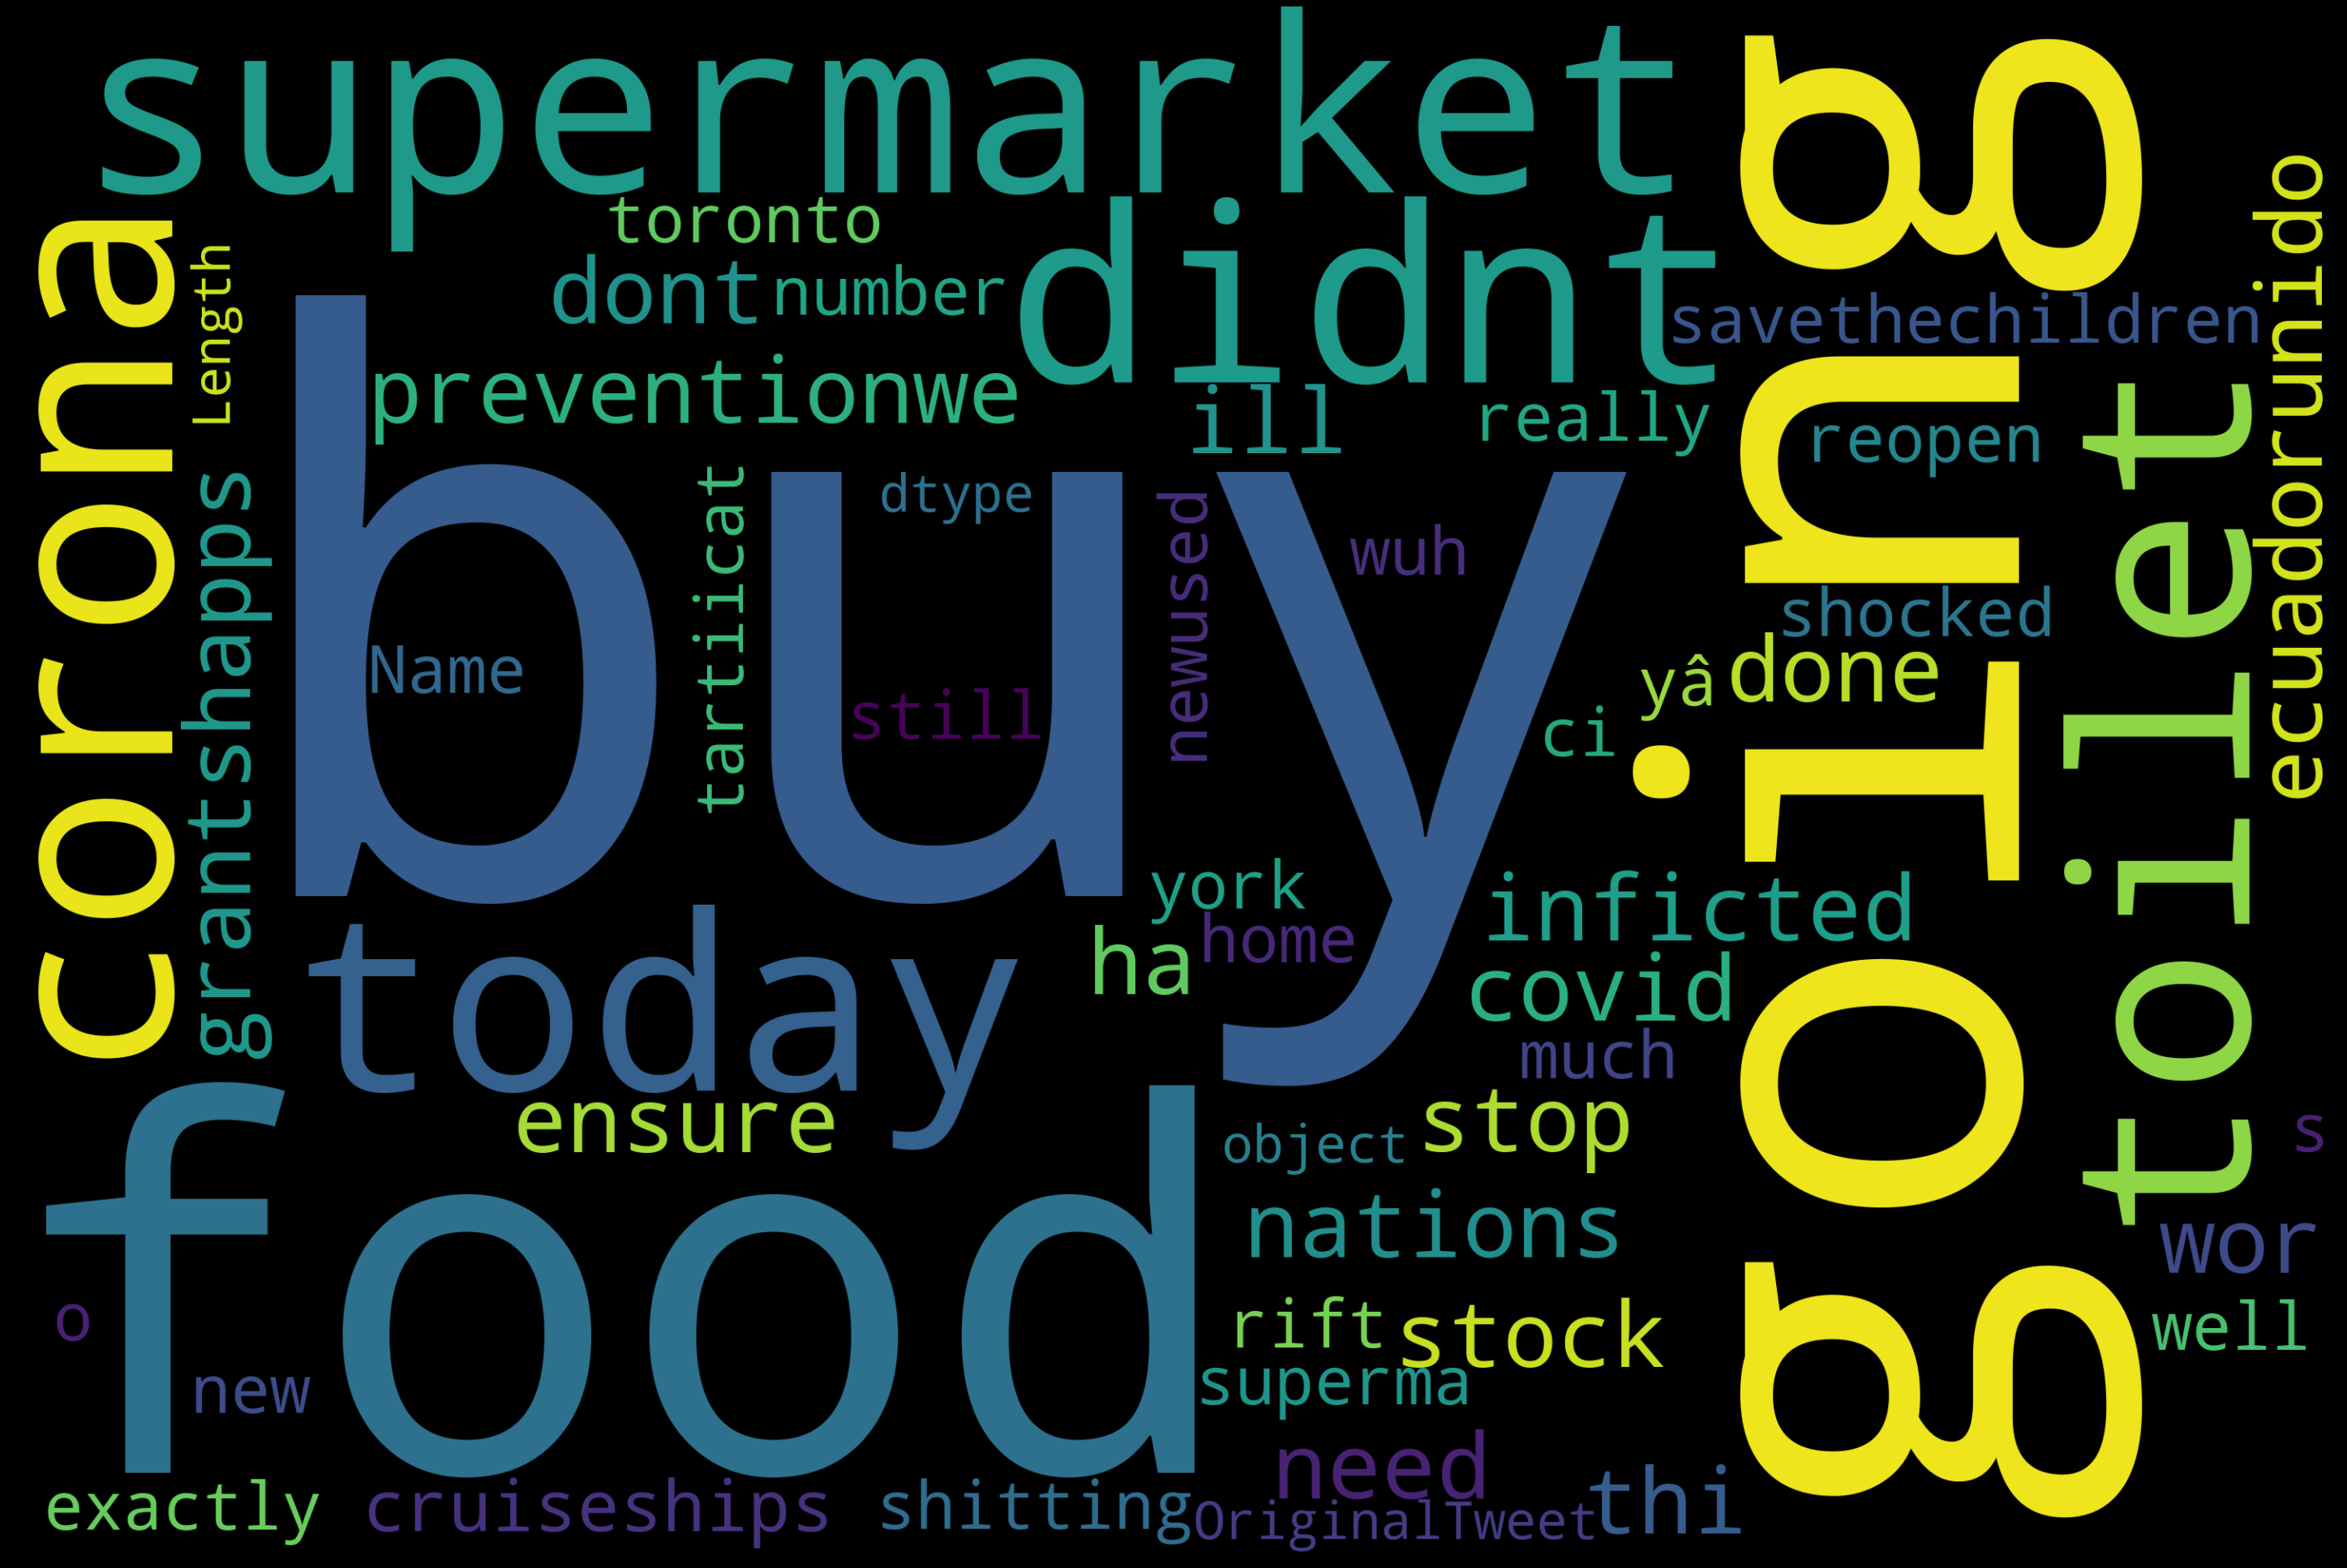

In [164]:
text = negative_review["OriginalTweet"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [166]:
# calling the label encoder function
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
reviews['Sentiment']= le.fit_transform(reviews['Sentiment']) 

reviews['Sentiment'].unique() 

array([3, 4, 2, 1, 0])

In [167]:
reviews['Sentiment'].value_counts()

Sentiment
4    9110
2    7763
3    6172
1    5273
0    4249
Name: count, dtype: int64

In [169]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['OriginalTweet']].reset_index(drop=True)
review_features.head()

,OriginalTweet
0,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...
2,coronavirus australia woolworths to give elder...
3,as news of the regionâs first confirmed case...
4,cashier at grocery store was sharing his insig...


In [171]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['OriginalTweet'])
X.shape

(32567, 5000)

In [172]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(32567,)

In our dataset, there are a lot of positive sentiments compared to negative and neutral, which makes our dataset imbalanced. In order to work for imbalance dataset, SMOTE technique is used to balance out the imbalanced dataset problem. It's aims is to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [173]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_resampled)}')

Original dataset shape : Counter({4: 9110, 2: 7763, 3: 6172, 1: 5273, 0: 4249})
Resampled dataset shape Counter({3: 9110, 4: 9110, 2: 9110, 1: 9110, 0: 9110})


In [174]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [175]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [176]:
#creating the objects
logreg = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'SVC', 4:'Naive Bayes', 5: 'Random Forest'}
cv_models = [logreg, dt, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 2, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.3675500251606273
Decision Tree Test Accuracy: 0.3190653485837947
KNN Test Accuracy: 0.22323126341860522
SVC Test Accuracy: 0.3604875595832875
Naive Bayes Test Accuracy: 0.37203303050217484
Random Forest Test Accuracy: 0.3740289715379201


In [177]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 2, verbose = 0,n_jobs = -1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

LogisticRegression(C=35.564803062231285, random_state=0)
The mean accuracy of the model is: 0.4908891328210757


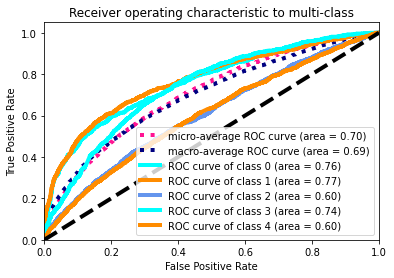

In [178]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel ='linear', probability = True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc = "lower right")
plt.show()  